The purpose of this notebook is to generate the baseline for `test_sinogram` in the tests module. This test generates a 32x32p sinogram of a single right triangle and a circle.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from xdesign import *
from numpy.testing import assert_allclose

`polytope` failed to import `cvxopt.glpk`.
Will use `scipy.optimize.linprog`.


In [2]:
circle = Feature(Circle(Point([0.7, 0.5]), radius=0.1))
triangle = Feature(Triangle(Point([0.2, 0.4]), Point([0.2, 0.6]), Point([0.4, 0.6])))

In [3]:
circtri = Phantom()
circtri.append(circle)
circtri.append(triangle)

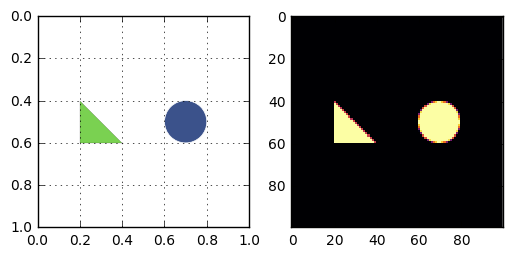

In [4]:
sidebyside(circtri)
plt.show()

## Variablilty Study

In [5]:
size = [32, 64, 128, 256]
reps = 20

Size: 32


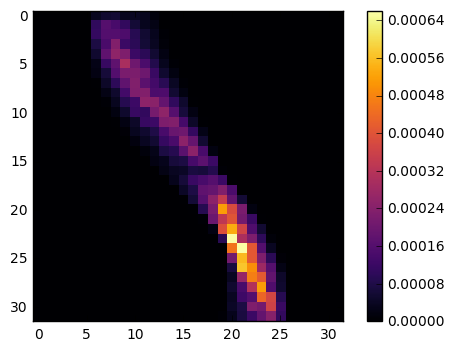

Size: 64


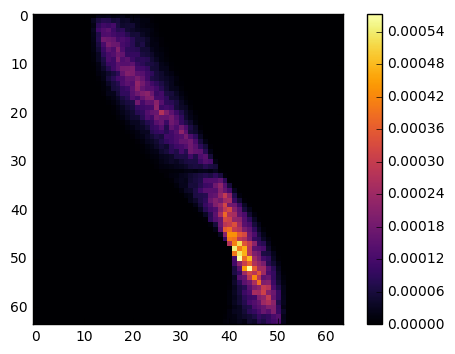

Size: 128


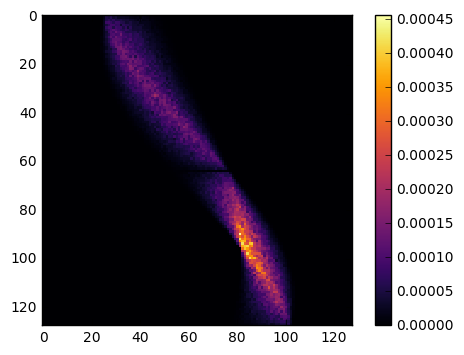

In [ ]:
sino_list = []
for s in size:

    this_sino = np.empty((s,s,reps))
    for r in range(reps):
        this_sino[:,:,r] = sinogram(s, s, circtri)

    sinoA = np.mean(this_sino, axis=2)
    sinoS = np.std(this_sino, axis=2)
    sino_list.append(sinoS)
    
    print("Size: %i" % s)
    plt.imshow(sinoS, cmap='inferno', interpolation='nearest')
    plt.colorbar()
    plt.show()

## Reference Generator 

In [8]:
sino = sinogram(32, 32, circtri)
np.save('test_sinogram.npy', sino, allow_pickle=False)

In [9]:
sino = sinogram(32, 32, circtri)
sino_reference = np.load('test_sinogram.npy')

In [13]:
assert_allclose(sino, sino_reference, atol=1e-2)